In [1]:
# Author: Peter Prettenhofer <peter.prettenhofer@gmail.com>
#         Maria Telenczuk <https://github.com/maikia>
#         Katrina Ni <https://github.com/nilichen>
#
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
#from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

## Load the data

##### First we need the data

In [4]:
diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


## Data preprocessing

Next, we will split our dataset to use 90% for training and leave the rest for testing. We will also set the regression model parameters. You can play with these parameters to see how the results change.

n_estimators : the number of boosting stages that will be performed. Later, we will plot deviance against boosting iterations.

max_depth : limits the number of nodes in the tree. The best value depends on the interaction of the input variables.

min_samples_split : the minimum number of samples required to split an internal node.

learning_rate : how much the contribution of each tree will shrink.

loss : loss function to optimize. The least squares function is used in this case however, there are many other options (see GradientBoostingRegressor ).


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13
)

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
#    "loss": "squared_loss", #this parameter needs a newer version scikit-learn than 0.24.1
}

## Fit regression model¶
Now we will initiate the gradient boosting regressors and fit it with our training data. Let’s also look and the mean squared error on the test data.

In [10]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = r2_score(y_test, reg.predict(X_test))
print("The R2 score on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 3009.5080


## Plot feature importance
Warning Careful, impurity-based feature importances can be misleading for high cardinality features (many unique values). As an alternative, the permutation importances of reg can be computed on a held out test set. See Permutation feature importance for more details.

For this example, the impurity-based and permutation methods identify the same 2 strongly predictive features but not in the same order. The third most predictive feature, “bp”, is also the same for the 2 methods. The remaining features are less predictive and the error bars of the permutation plot show that they overlap with 0.

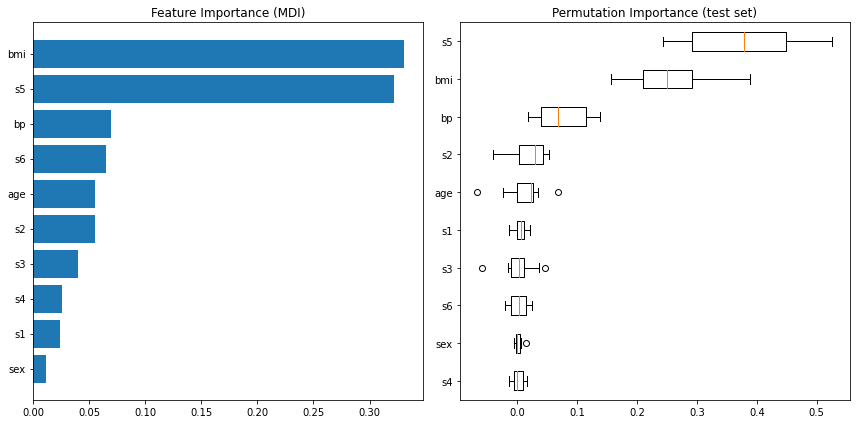

In [11]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(diabetes.feature_names)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(diabetes.feature_names)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()